In [46]:
import pandas as pd
import matplotlib

In [58]:
def plot_dict(d, label="Please Label Me!!!"):
    ax = pd.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

In [43]:
def get_flow_dict(filename, attribute):
    df = pd.read_csv(filename)
    flow_dict = {}
    for index, row in df.iterrows(): 
        src_mac = df.loc[index,"source_mac"]
        flow_volume = float(df.loc[index,attribute])
        if src_mac not in flow_dict:
            flow_dict[src_mac] = 0
        flow_dict[src_mac] += flow_volume
    with open("devicelist.txt") as f:
        target_macs = [line.rstrip().lower() for line in f]
    device_map = {}
    for mac in target_macs:
        device_mac = mac.split("-")[0]
        device_name = mac.split("-")[1]
        device_map[device_mac] = device_name
        
    new_flow_dict = {}
    for src_mac in flow_dict:
        if src_mac not in device_map:
            continue
        new_flow_dict[device_map[src_mac]] = flow_dict[src_mac]
    
    print (new_flow_dict) 
    return new_flow_dict

In [80]:
filename = "merged_traces_unsw.csv"
flow_rate = get_flow_dict(filename, "flow_rate")
flow_volume = get_flow_dict(filename, "flow_volume")
flow_duration = get_flow_dict(filename, "flow_duration")

{'tplinkrouterbridgelan(gateway)': 177488458.5846912, 'amazonecho': 904047.8764493552, 'belkinwemoswitch': 19091921.869546797, 'samsungsmartcam': 7676278.358807876, 'tribyspeaker': 833.9575599322836, 'belkinwemomotionsensor': 2236615.467427987, 'insteoncamera': 190760.08262293087, 'samsunggalaxytab': 570290.117878635, 'netatmowelcome': 66266.89002234716, 'netatmoweatherstation': 27.341356290976425, 'lightbulbslifxsmartbulb': 150.0770598159962, 'smartthings': 339.77978496837585, 'hpprinter': 90589.5119510221, 'macbook': 290952.21869307244, 'withingssmartbabymonitor': 16240.968760600865, 'tplinkdaynightcloudcamera': 472.1912726160711, 'tplinksmartplug': 56.11928531081658, 'pixstarphotoframe': 81829.81454741952, 'dropcam': 8989.125418545997, 'withingssmartscale': 204.82520541908227, 'androidphone': 8089.917860923202, 'nestprotectsmokealarm': 487.2910026512961, 'laptop': 105382.07687283737, 'iphone': 1674.2710110746727}
{'tplinkrouterbridgelan(gateway)': 2837621095.0, 'amazonecho': 1363655

In [75]:
def drop_device(flow_dict, device):
    new_flow_dict = {}
    for key, val in flow_dict.items():
        if key != device:
            new_flow_dict[key] = val
    return new_flow_dict

new_flow_rate = drop_device(flow_rate,"tplinkrouterbridgelan(gateway)")
new_flow_volume = drop_device(flow_volume,"tplinkrouterbridgelan(gateway)")
new_flow_duration = drop_device(flow_duration,"tplinkrouterbridgelan(gateway)")

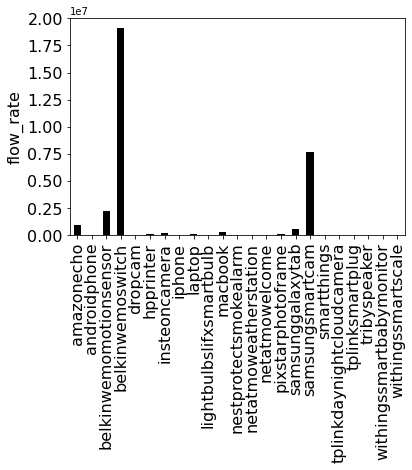

In [70]:
plot_dict(flow_rate, "flow_rate")

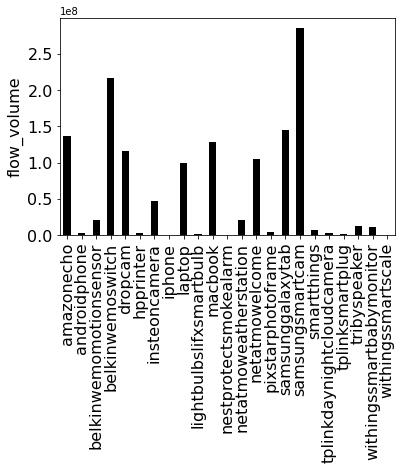

In [72]:
plot_dict(flow_volume, "flow_volume")

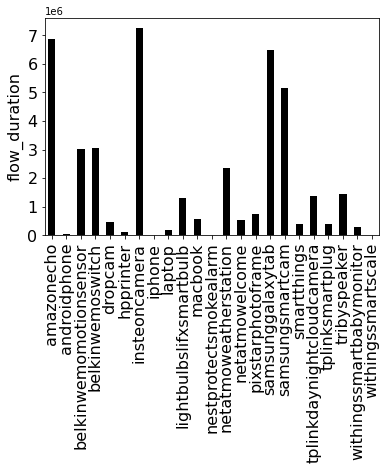

In [76]:
plot_dict(flow_duration, "flow_duration")

In [77]:
#  'amazonecho': 904047.8764493552,
#  'belkinwemoswitch': 19091921.869546797,
#  'samsungsmartcam': 7676278.358807876,
#  'samsunggalaxytab': 570290.117878635,
#  'hpprinter': 90589.5119510221,
#  'macbook': 290952.21869307244,


#  'withingssmartbabymonitor': 16240.968760600865,
#  'pixstarphotoframe': 81829.81454741952,

SyntaxError: illegal target for annotation (Temp/ipykernel_32416/385294622.py, line 1)

In [86]:
devices = ['amazonecho','belkinwemoswitch', 'samsungsmartcam', 'samsunggalaxytab', 'hpprinter', 'macbook']
for device in devices:
    print (device, flow_duration[device]*0.000277778, flow_volume[device]*1e-6, flow_rate[device]*1e-6/0.000277778)

amazonecho 1909.5590070217168 136.365519 3254.569751561877
belkinwemoswitch 847.9159428398763 216.773362 68730.86374567746
samsungsmartcam 1427.1537963854482 285.422261 27634.579984044365
samsunggalaxytab 1799.3813609240212 145.12155099999998 2053.04278192886
hpprinter 34.459985075020015 3.2939089999999998 326.1219821260938
macbook 162.70038097257222 128.883667 1047.4271493533413


In [87]:
sleep_time = get_flow_dict(filename, "sleep_time")

{'tplinkrouterbridgelan(gateway)': 1647560.8756563417, 'amazonecho': 1638768.6104135802, 'belkinwemoswitch': 1564327.9187169038, 'samsungsmartcam': 1648657.9028230396, 'tribyspeaker': 416339.81040735287, 'belkinwemomotionsensor': 1576269.4993112716, 'insteoncamera': 1270439.9005510977, 'samsunggalaxytab': 1340830.356821078, 'netatmowelcome': 1407201.3420996591, 'netatmoweatherstation': 40264.08603811264, 'lightbulbslifxsmartbulb': 684418.6052637468, 'smartthings': 487919.1711791813, 'hpprinter': 163177.45995479322, 'macbook': 30535.2441568804, 'withingssmartbabymonitor': 379284.55365696375, 'tplinkdaynightcloudcamera': 136697.4782572287, 'tplinksmartplug': 387777.0286211516, 'pixstarphotoframe': 377890.6888227591, 'dropcam': 25932.153740425903, 'withingssmartscale': 0.24660587310790716, 'androidphone': 3520.8250226667424, 'nestprotectsmokealarm': 722.4790468215942, 'laptop': 10949.42536015179, 'iphone': 4445.663992696339}


In [88]:
sleep_time

{'tplinkrouterbridgelan(gateway)': 1647560.8756563417,
 'amazonecho': 1638768.6104135802,
 'belkinwemoswitch': 1564327.9187169038,
 'samsungsmartcam': 1648657.9028230396,
 'tribyspeaker': 416339.81040735287,
 'belkinwemomotionsensor': 1576269.4993112716,
 'insteoncamera': 1270439.9005510977,
 'samsunggalaxytab': 1340830.356821078,
 'netatmowelcome': 1407201.3420996591,
 'netatmoweatherstation': 40264.08603811264,
 'lightbulbslifxsmartbulb': 684418.6052637468,
 'smartthings': 487919.1711791813,
 'hpprinter': 163177.45995479322,
 'macbook': 30535.2441568804,
 'withingssmartbabymonitor': 379284.55365696375,
 'tplinkdaynightcloudcamera': 136697.4782572287,
 'tplinksmartplug': 387777.0286211516,
 'pixstarphotoframe': 377890.6888227591,
 'dropcam': 25932.153740425903,
 'withingssmartscale': 0.24660587310790716,
 'androidphone': 3520.8250226667424,
 'nestprotectsmokealarm': 722.4790468215942,
 'laptop': 10949.42536015179,
 'iphone': 4445.663992696339}

In [91]:
for device in devices:
    print (device, sleep_time[device]*0.000277778)

amazonecho 455.2138670634635
belkinwemoswitch 434.5358806053441
samsungsmartcam 457.9608949303783
samsunggalaxytab 372.45317485704544
hpprinter 45.32710847132255
macbook 8.482019051409925
